In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import cv2
from xml.dom import minidom
import os
from skimage.draw import polygon
from PIL import Image
seed = np.random.RandomState(42)
width = 24
height = 24
angle = 180
sig = 4
alpha = 20
patch_size = np.array([250, 250])
stride = 49


def generate_labelled_array(shape, xml_file):
    """
    Given the image shape and path to annotations(xml file), 
    generate a bit mask with the region inside a contour being white
    shape: The image shape on which bit mask will be made
    xml_file: path relative to the current working directory 
    where the xml file is present
    Returns: A image of given shape with region inside contour being white..
    """
    # DOM object created by the minidom parser
    xDoc = minidom.parse(xml_file)

    # List of all Region tags
    regions = xDoc.getElementsByTagName('Region')

    # List which will store the vertices for each region
    xy = []
    for region in regions:
        # Loading all the vertices in the region
        vertices = region.getElementsByTagName('Vertex')

        # The vertices of a region will be stored in a array
        vw = np.zeros((len(vertices), 2))

        for index, vertex in enumerate(vertices):
            # Storing the values of x and y coordinate after conversion
            vw[index][0] = float(vertex.getAttribute('X'))
            vw[index][1] = float(vertex.getAttribute('Y'))

        # Append the vertices of a region
        xy.append(np.int32(vw))

    # Creating a completely black image
    mask = np.zeros(shape, np.float32)

    for i, contour in enumerate(xy):
        r, c = polygon(np.array(xy[i])[:, 1],
                       np.array(xy[i])[:, 0], shape=shape)
        mask[r, c] = i
    return mask

# TODO: Provide better names


def create_patch(path_anot, path_img, save_path_anot, save_path_img, patch_size, img_name, stride):
    """
    Goes through the files in path_anot as well as path_img, loads the image
    from path_img and generates the bit_mask from path_anot. Goes around the 
    image in both to extract patches of size specified above.
    Saves them into the location given by save_path.
    The path is a LIST of corresponding path names.
    """
    for j, (p_a, p_i, img_n) in enumerate(zip(path_anot, path_img, img_name)):
        print(f"{j + 1 : >3}: {img_n}")
        img = np.array(Image.open(p_i))
        i_h, i_w = img.shape[:2]
        p_h, p_w = patch_size

        bit_m = generate_labelled_array((1000, 1000), p_a)
        assert img.shape[:2] == bit_m.shape

        for i, x in enumerate(range(0, i_w - p_w + 1, stride)):
            for y in range(0, i_h - p_h + 1, stride):
                patch_img = img[x:x+p_w, y:y+p_h]
                patch_bit = bit_m[x:x+p_w, y:y+p_h]

                img_path_save = save_path_img + "/" + \
                    img_n + "_" + str(i + 1) + ".png"
                Image.fromarray(patch_img).save(img_path_save)
                mat_path_save = save_path_anot + "/" + \
                    img_n + "_" + str(i + 1) + ".mat"
                sio.savemat(mat_path_save, {'data': patch_bit})


def make_directory_structure(dir_xml, dir_img, save_path_anot, save_path_img, img_extension):
    if os.path.exists(save_path_anot):
        print("Looks like patches have been created.")
        return
        # shutil.rmtree(save_path_anot)
    os.makedirs(save_path_anot)

    if os.path.exists(save_path_img):
        print("Looks like patches have been created")
        return
        # shutil.rmtree(save_path_img)
    os.makedirs(save_path_img)

    path_anot = []
    path_img = []
    img_name_list = []

    for img_name, xml_name in zip(os.listdir(dir_img), os.listdir(dir_xml)):
        img_name = img_name.split('.')[0]
        path_anot.append(dir_xml + "/" + img_name + ".xml")
        path_img.append(dir_img + "/" + img_name + img_extension)
        img_name_list.append(img_name)

    create_patch(path_anot, path_img, save_path_anot,
                 save_path_img, patch_size, img_name_list, stride)


make_directory_structure(
    dir_xml='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/Annotations',
    dir_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/Data',
    save_path_anot='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/train/masks',
    save_path_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/train/imgs',
    img_extension='.png'
)

make_directory_structure(
    dir_xml='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/Val_masks',
    dir_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/Val_imgs',
    save_path_anot='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/val/masks',
    save_path_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/val/imgs',
    img_extension='.png'
)


make_directory_structure(
    dir_xml='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/Test_Annotations',
    dir_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/MoNuSegTestData',
    save_path_anot='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/test/masks',
    save_path_img='/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/test/imgs',
    img_extension='.tif'
)

Looks like patches have been created.
Looks like patches have been created.
Looks like patches have been created.




  0%|          | 0/806 [00:00<?, ?it/s]

  1%|          | 6/806 [00:00<00:13, 57.68it/s]

  1%|▏         | 12/806 [00:00<00:13, 57.79it/s]

  2%|▏         | 18/806 [00:00<00:13, 57.64it/s]

  3%|▎         | 24/806 [00:00<00:13, 57.28it/s]

  4%|▎         | 30/806 [00:00<00:13, 55.54it/s]

  4%|▍         | 36/806 [00:00<00:13, 55.87it/s]

  5%|▌         | 42/806 [00:00<00:13, 56.75it/s]

  6%|▌         | 48/806 [00:00<00:13, 57.38it/s]

  7%|▋         | 55/806 [00:00<00:12, 58.70it/s]

  8%|▊         | 61/806 [00:01<00:12, 58.90it/s]

  8%|▊         | 68/806 [00:01<00:12, 59.88it/s]

  9%|▉         | 75/806 [00:01<00:12, 60.56it/s]

 10%|█         | 81/806 [00:01<00:12, 59.75it/s]

 11%|█         | 87/806 [00:01<00:12, 58.62it/s]

 12%|█▏        | 94/806 [00:01<00:11, 59.96it/s]

 12%|█▏        | 100/806 [00:01<00:11, 59.50it/s]

 13%|█▎        | 106/806 [00:01<00:12, 58.27it/s]

 14%|█▍        | 113/806 [00:01<00:11, 59.20it/s]

 15%|█▍        | 120/806 [00:02<00:11, 60.67it/s]

 16%

Done!


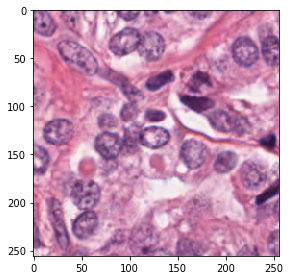

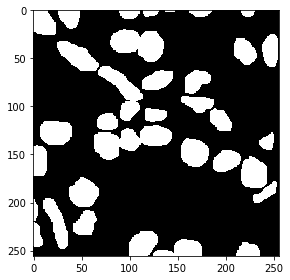

In [ ]:
import tensorflow as tf
import os
import numpy as np
import random
from tqdm import tqdm
import scipy.io as sio

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


#################################################
# Data
Img_width = 256
Img_height = 256
Img_channel = 3

Train_Path_Imgs = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/train/imgs/'
Train_Path_Masks = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/train/masks/'
Val_Path_Imgs = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/val/imgs/'
Val_Path_Masks = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/val/masks/'
Test_Path_Imgs = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/test/imgs/'
Test_Path_Masks = '/content/drive/My Drive/MoNuSegTrainingData/MoNuSegTrainingData/test/masks/'

Train_ids_imgs = next(os.walk(Train_Path_Imgs))[2]
Val_ids_imgs = next(os.walk(Val_Path_Imgs))[2]
Train_ids_masks = next(os.walk(Train_Path_Masks))[2]
Val_ids_masks = next(os.walk(Val_Path_Masks))[2]
Test_ids_imgs = next(os.walk(Test_Path_Imgs))[2]
Test_ids_masks = next(os.walk(Test_Path_Masks))[2]


Img_Train_X = np.zeros(
    (930, Img_width, Img_height, 3), dtype=np.uint8)
Img_Train_Y = np.zeros(
    (930, Img_width, Img_height, 1), dtype=np.bool)


for n, id in tqdm(enumerate(Train_ids_imgs), total=len(Train_ids_imgs)):
    path = Train_Path_Imgs + id
    img = imread(path)[:, :, :Img_channel]
    img = resize(img, (Img_height, Img_width),
                 mode='constant', preserve_range=True)
    Img_Train_X[n] = img  # Fill empty X_train with values from img
for m, id in tqdm(enumerate(Val_ids_imgs), total=len(Val_ids_imgs)): 
    path = Val_Path_Imgs + id
    img = imread(path)[:, :, :Img_channel]
    img = resize(img, (Img_height, Img_width),
                 mode='constant', preserve_range=True)
    Img_Train_X[n+m+1] = img  # Fill empty X_train with values from img

for n, id in tqdm(enumerate(Train_ids_masks), total=len(Train_ids_masks)):
    path = Train_Path_Masks + id
    mask = sio.loadmat(path)['data'].astype(np.bool)
    mask = resize(
            mask, (Img_height, Img_width, 1), mode='constant', preserve_range=True)
    Img_Train_Y[n] = mask  
for m, id in tqdm(enumerate(Val_ids_masks), total=len(Val_ids_masks)): 
    path = Val_Path_Masks + id
    mask = sio.loadmat(path)['data'].astype(np.bool)
    mask = resize(
            mask, (Img_height, Img_width, 1), mode='constant', preserve_range=True)
    Img_Train_Y[n +m +1] = mask 

# test images
Img_Test_X = np.zeros(
    (len(Test_ids_imgs), Img_width, Img_height, Img_channel), dtype=np.uint8)
sizes_test = []
for n, id in tqdm(enumerate(Test_ids_imgs), total=len(Test_ids_imgs)):
    path = Test_Path_Imgs + id
    img = imread(path)[:, :, :Img_channel]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (Img_height, Img_width),
                 mode='constant', preserve_range=True)
    Img_Test_X[n] = img

print('Done!')


image_x = random.randint(0, len(Train_ids_imgs))
imshow(Img_Train_X[image_x])
plt.show()
imshow(np.squeeze(Img_Train_Y[image_x]))
plt.show()

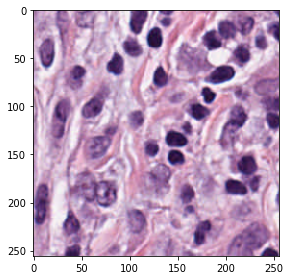

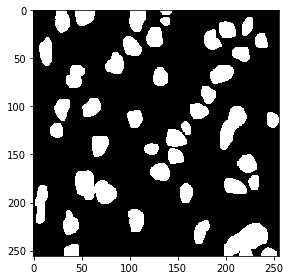

In [ ]:
imshow(Img_Train_X[479])
plt.show()
imshow(np.squeeze(Img_Train_Y[479]))
plt.show()

In [ ]:
##################################################
# U_net

Input_layer = tf.keras.layers.Input((Img_width, Img_height, Img_channel))
inp = tf.keras.layers.Lambda(lambda x: x/225)(Input_layer)

Conv1 = tf.keras.layers.Conv2D(
    16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inp)
Conv1 = tf.keras.layers.Dropout(0.1)(Conv1)
Conv1 = tf.keras.layers.Conv2D(
    16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inp)
Pool1 = tf.keras.layers.MaxPooling2D((2, 2))(Conv1)

Conv2 = tf.keras.layers.Conv2D(
    32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Pool1)
Conv2 = tf.keras.layers.Dropout(0.1)(Conv2)
Conv2 = tf.keras.layers.Conv2D(
    32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv2)
Pool2 = tf.keras.layers.MaxPooling2D((2, 2))(Conv2)


Conv3 = tf.keras.layers.Conv2D(
    64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Pool2)
Conv3 = tf.keras.layers.Dropout(0.1)(Conv3)
Conv3 = tf.keras.layers.Conv2D(
    64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv3)
Pool3 = tf.keras.layers.MaxPooling2D((2, 2))(Conv3)


Conv4 = tf.keras.layers.Conv2D(
    128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Pool3)
Conv4 = tf.keras.layers.Dropout(0.05)(Conv4)
Conv4 = tf.keras.layers.Conv2D(
    128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv4)
Pool4 = tf.keras.layers.MaxPooling2D((2, 2))(Conv4)


Conv5 = tf.keras.layers.Conv2D(
    256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Pool4)
Conv5 = tf.keras.layers.Dropout(0.2)(Conv5)
Conv5 = tf.keras.layers.Conv2D(
    256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv5)


ConvT1 = tf.keras.layers.Conv2DTranspose(128, (2, 2),strides=(2, 2), padding='same')(Conv5)
ConvT1 = tf.keras.layers.concatenate([ConvT1, Conv4])
Conv6 = tf.keras.layers.Conv2D(
    128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(ConvT1)
Conv6 = tf.keras.layers.Dropout(0.1)(Conv6)
Conv6 = tf.keras.layers.Conv2D(
    128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv6)


ConvT2 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2),padding='same')(Conv6)
ConvT2 = tf.keras.layers.concatenate([ConvT2, Conv3])
Conv7 = tf.keras.layers.Conv2D(
    64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(ConvT2)
Conv7 = tf.keras.layers.Dropout(0.2)(Conv7)
Conv7 = tf.keras.layers.Conv2D(
    64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv7)

ConvT3 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2),padding='same')(Conv7)
ConvT3 = tf.keras.layers.concatenate([ConvT3, Conv2])
Conv8 = tf.keras.layers.Conv2D(
    32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(ConvT3)
Conv8 = tf.keras.layers.Dropout(0.2)(Conv8)
Conv8 = tf.keras.layers.Conv2D(
    32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv8)

ConvT4 = tf.keras.layers.Conv2DTranspose(16, (2, 2),strides=(2, 2), padding='same')(Conv8)
ConvT4 = tf.keras.layers.concatenate([ConvT4, Conv1])
Conv9 = tf.keras.layers.Conv2D(
    16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(ConvT4)
Conv9 = tf.keras.layers.Dropout(0.1)(Conv9)
Conv9 = tf.keras.layers.Conv2D(
    16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(Conv9)

Output_layer = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(Conv9)


In [ ]:
model = tf.keras.Model(inputs=[Input_layer], outputs=[Output_layer])
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
check_pointer = tf.keras.callbacks.ModelCheckpoint(
    'model_for_nuclei.h5', verbose=1, save_best_only=True)

#callback = [tf.keras.callbacks.EarlyStopping(
#    patience=2, monitor='val_loss'), tf.keras.callbacks.TensorBoard(log_dir='logs')]

output = model.fit(Img_Train_X, Img_Train_Y, batch_size=20,
                   epochs=20, validation_split=0.1, verbose=2)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 16) 0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
Preds_train = model.predict(
    Img_Train_X[:int(Img_Train_X.shape[0]*0.9)], verbose=1)
Preds_val = model.predict(
    Img_Train_X[int(Img_Train_X.shape[0]*0.9):], verbose=1)
Preds_test = model.predict(Img_Test_X, verbose=1)


14/14 [==============================] - 1s 53ms/step


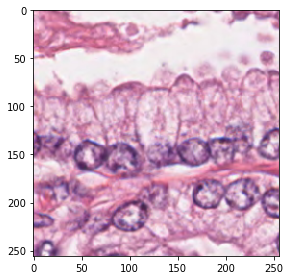

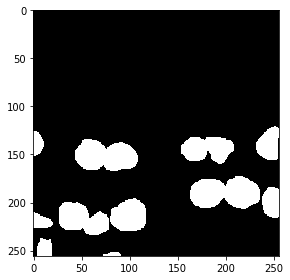

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


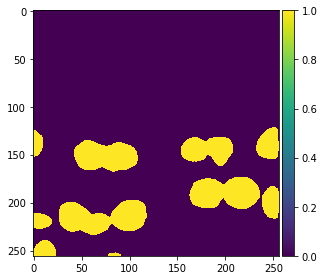

In [ ]:
preds_train_t = (Preds_train > 0.5).astype(np.uint8)
preds_val_t = (Preds_val > 0.5).astype(np.uint8)
preds_test_t = (Preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
i = random.randint(0, len(preds_train_t))
imshow(Img_Train_X[i])
plt.show()
imshow(np.squeeze(Img_Train_Y[i]))
plt.show()
imshow(np.squeeze(preds_train_t[i]))
plt.show()

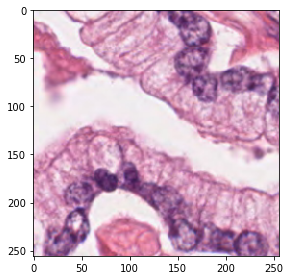

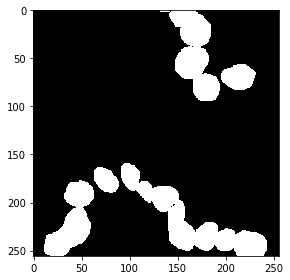

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


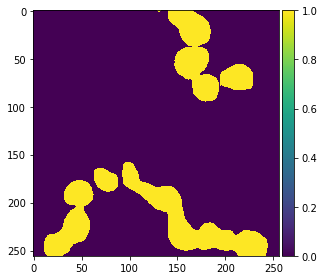

In [ ]:
preds_train_t = (Preds_train > 0.5).astype(np.uint8)
preds_val_t = (Preds_val > 0.5).astype(np.uint8)
preds_test_t = (Preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
i = random.randint(0, len(preds_train_t))
imshow(Img_Train_X[i])
plt.show()
imshow(np.squeeze(Img_Train_Y[i]))
plt.show()
imshow(np.squeeze(preds_train_t[i]))
plt.show()


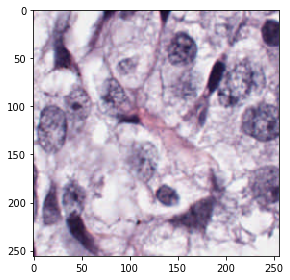

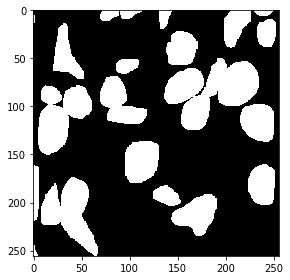

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


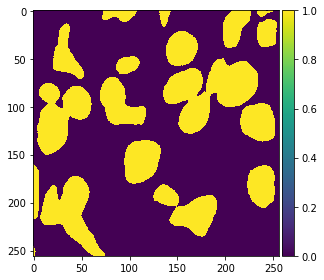

In [ ]:
preds_train_t = (Preds_train > 0.5).astype(np.uint8)
preds_val_t = (Preds_val > 0.5).astype(np.uint8)
preds_test_t = (Preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
i = random.randint(0, len(preds_train_t))
imshow(Img_Train_X[i])
plt.show()
imshow(np.squeeze(Img_Train_Y[i]))
plt.show()
imshow(np.squeeze(preds_train_t[i]))
plt.show()